In [3]:
import numpy as np
import pandas as pd
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('heart.csv')
df.head()


#age
#sex
#chest pain type (4 values)
#resting blood pressure
#serum cholestoral in mg/dl
#fasting blood sugar > 120 mg/dl
#resting electrocardiographic results (values 0,1,2)
#maximum heart rate achieved
#exercise induced angina
#oldpeak = ST depression induced by exercise relative to rest
#the slope of the peak exercise ST segment
#number of major vessels (0-3) colored by flourosopy
#thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


C:\Users\DELLS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


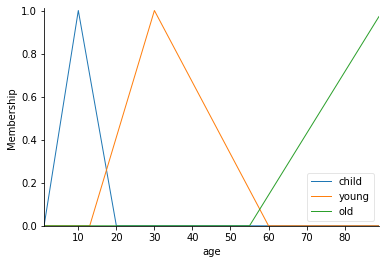

In [25]:
age=ctrl.Antecedent(np.arange(1,90,1),"age")
age['child']=fuzzy.trimf(age.universe,[1,10,20])
age['young']=fuzzy.trimf(age.universe,[13,30,60])
age['old']=fuzzy.trimf(age.universe,[55,90,90])
age.view()


C:\Users\DELLS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


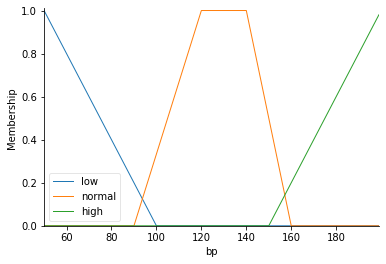

In [36]:
bp=ctrl.Antecedent(np.arange(50,200,1),"bp")
bp['low']=fuzzy.trimf(bp.universe,[50,50,100])
bp['normal']=fuzzy.trapmf(bp.universe,[90,120,140,160])
bp['high']=fuzzy.trimf(bp.universe,[150,200,200])
bp.view()


C:\Users\DELLS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


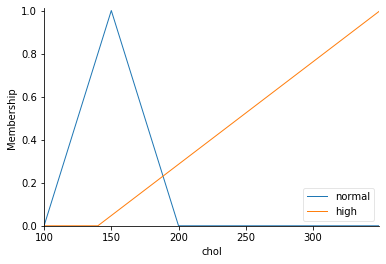

In [38]:
chol=ctrl.Antecedent(np.arange(100,350,1),"chol")
chol['normal']=fuzzy.trimf(chol.universe,[100,150,200])
chol['high']=fuzzy.trimf(chol.universe,[140,350,350])
chol.view()


C:\Users\DELLS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


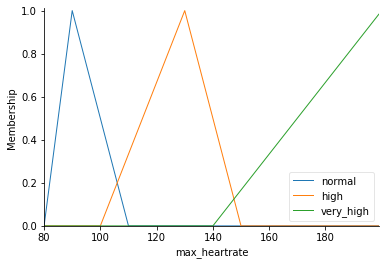

In [41]:
max_heartrate=ctrl.Antecedent(np.arange(80,200,1),"max_heartrate")
max_heartrate['normal']=fuzzy.trimf(max_heartrate.universe,[80,90,110])
max_heartrate['high']=fuzzy.trimf(max_heartrate.universe,[100,130,150])
max_heartrate['very_high']=fuzzy.trimf(max_heartrate.universe,[140,200,200])

max_heartrate.view()

C:\Users\DELLS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


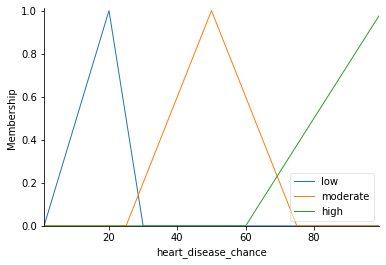

In [49]:
heart_disease_chance=ctrl.Consequent(np.arange(1,100,1),"heart_disease_chance")
heart_disease_chance['low']=fuzzy.trimf(heart_disease_chance.universe,[1,20,30])
heart_disease_chance['moderate']=fuzzy.trimf(heart_disease_chance.universe,[25,50,75])
heart_disease_chance['high']=fuzzy.trimf(heart_disease_chance.universe,[60,100,100])

heart_disease_chance.view()

In [59]:
#rules over - age,bp,chol, max_heartrate
rule1=ctrl.Rule(age['child'] & bp['normal'] & chol['normal'] & max_heartrate['normal'], heart_disease_chance['low'])
rule2=ctrl.Rule(age['young'] & bp['high'] & chol['high'] & max_heartrate['very_high'], heart_disease_chance['high'])
rule3=ctrl.Rule(age['old'] & bp['low'] & chol['high'] & max_heartrate['normal'], heart_disease_chance['moderate'])
rule4=ctrl.Rule(age['child'] & bp['high'] & chol['high'] & max_heartrate['very_high'], heart_disease_chance['high'])
rule5=ctrl.Rule(age['young'] & bp['normal'] & chol['normal'] & max_heartrate['normal'], heart_disease_chance['low'])
rule6=ctrl.Rule(age['old'] & bp['normal'] & chol['normal'] & max_heartrate['normal'], heart_disease_chance['low'])
rule7=ctrl.Rule(age['old'] & bp['high'] & chol['normal'] & max_heartrate['high'], heart_disease_chance['moderate'])
rule8=ctrl.Rule(age['old'] & bp['low'] & chol['high'] & max_heartrate['high'], heart_disease_chance['high'])
rule9=ctrl.Rule(age['child'] & bp['low'] & chol['normal'] & max_heartrate['normal'], heart_disease_chance['low'])
rule10=ctrl.Rule(age['child'] & bp['high'] & chol['normal'] & max_heartrate['high'], heart_disease_chance['moderate'])
rule11=ctrl.Rule(age['young'] & bp['low'] & chol['high'] & max_heartrate['low'], heart_disease_chance['high'])
rule12=ctrl.Rule(age['young'] & bp['high'] & chol['normal'] & max_heartrate['normal'], heart_disease_chance['low'])
rules=[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12]


In [60]:
x=ctrl.ControlSystem(rules)
y=ctrl.ControlSystemSimulation(x)

In [61]:
y.input['age']=10
y.input['bp']=120
y.input['chol']=120
y.input['max_heartrate']=90
y.compute()
print(y.output['heart_disease_chance'])

16.325


In [ ]:
#https://github.com/DeekshaKhosla/fuzzy-logic.git